# Heart Disease Research Part II

In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and then cleaned for analysis. The principal investigators responsible for data collection were:

1.    Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2.    University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3.    University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4.    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom_test
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

## Inspect the data
1. The data has been saved as a dataframe named heart in script.py. It contains the following variables:

    -    `age`: age in years
    -    `sex`: sex assigned at birth; `'male'` or `'female'`
    -    `trestbps`: resting blood pressure in mm Hg
    -    `chol`: serum cholesterol in mg/dl
    -    `cp`: chest pain type (`'typical angina'`, `'atypical angina'`, `'non-anginal pain'`, or `'asymptomatic'`)
    -    `exang`: whether the patient experiences exercise-induced angina (`1`: yes; `0`: no)
    -    `fbs`: whether the patient’s fasting blood sugar is >120 mg/dl (`1`: yes; `0`: no)
    -    `thalach`: maximum heart rate achieved in exercise test
    -    `heart_disease`: whether the patient is found to have heart disease (`'presence'`: diagnosed with heart disease; `'absence'`: no heart disease)

   Inspect the first few rows of data using the `.head()` method.


In [2]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


## Predictors of Heart Disease
2. Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, `thalach` gives us the highest heart rate that the patient achieved during this test.

   Is `thalach` associated with whether or not a patient will ultimately be diagnosed with heart disease? Use `sns.boxplot()` to plot side by side box plots of `thalach` for patients who were and were not diagnosed with heart disease (indicated by the `heart_disease` variable). Do you think there is a relationship between these variables?

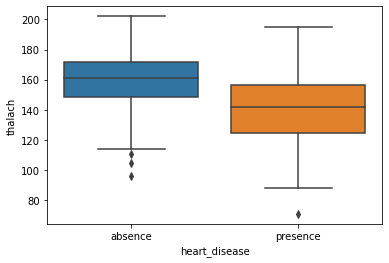

In [3]:
sns.boxplot(data=heart, x='heart_disease', y='thalach')
plt.show()

*Oh yes.*

3. In order to investigate this question further, save the values for thalach among patients who were diagnosed with heart disease as a variable named `thalach_hd`. Then save the values of thalach among patients who were not diagnosed with heart disease as `thalach_no_hd`.

In [4]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

4. Calculate and print the difference in mean `thalach` for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [5]:
mean_diff = round(np.mean(thalach_hd) - np.mean(thalach_no_hd),2)
print('The difference between mean max heart rate with and without heart disease present is: ' + str(mean_diff) + '\n')

med_diff = round(np.median(thalach_hd) - np.median(thalach_no_hd),2)
print('The difference between median max heart rate with and without heart disease present is: ' + str(med_diff) + '\n')

The difference between mean max heart rate with and without heart disease present is: -19.12

The difference between median max heart rate with and without heart disease present is: -19.0



5. We’d like to find out if the average `thalach` of a heart disease patient is significantly different from the average thalach for a person without heart disease.

   Import the statistical test from scipy.stats that we would use to test the following null and alternative hypotheses:

    -    Null: The average `thalach` for a person with heart disease is equal to the average `thalach` for a person without heart disease.
    -    Alternative: The average `thalach` for a person with heart disease is NOT equal to the average `thalach` for a person without heart disease.

*Two-sample t-test? Yes, imported `ttest_ind()`.*

6. Run the hypothesis test from task 5 and print out the p-value. Using a significance threshold of 0.05, is there a significant difference in average `thalach` for people with heart disease compared to people with no heart disease?

In [20]:
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(pval)

3.456964908430172e-14


*Yes! 0.0000000000000346 is significant!*

7. Using the same process, investigate at least one other quantitative variable. Options include `age`, `trestbps` (resting blood pressure), and `chol` (cholesterol). Are any of these variables also significantly associated with heart disease?

   Note: before every new plot that you make, be sure to use `plt.clf()` to clear the previous plot first, so that plots don’t get layered on top of each other. For example:

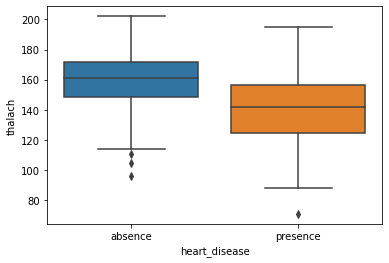

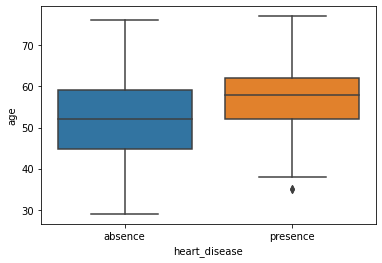

In [6]:
# first box plot:
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show()
 
# second box plot:
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()

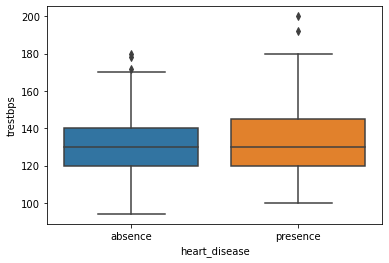

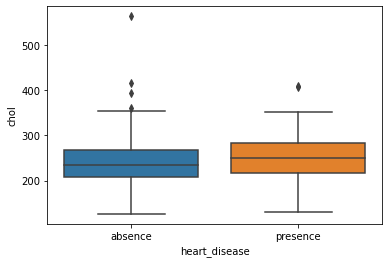

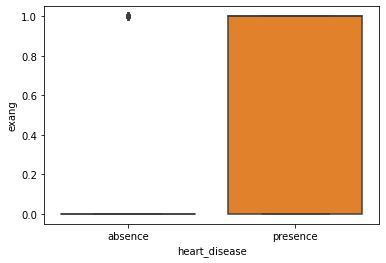

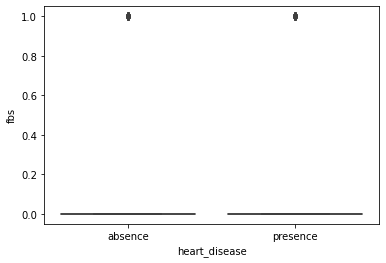

In [7]:
# age, sex, trestbps, chol, cp, exang, fbs
# sns.boxplot(x=heart.heart_disease, y=heart.sex)
# plt.show()

plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show()

plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.show()

# plt.clf()
# sns.boxplot(x=heart.heart_disease, y=heart.cp)
# plt.show()

plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.exang)
plt.show()

plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.fbs)
plt.show()


In [28]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']

trestbps_hd = heart.trestbps[heart.heart_disease == 'presence']
trestbps_no_hd = heart.trestbps[heart.heart_disease == 'absence']

chol_hd = heart.chol[heart.heart_disease == 'presence']
chol_no_hd = heart.chol[heart.heart_disease == 'absence']

In [32]:
age_ttest, age_pval = ttest_ind(age_hd, age_no_hd)
print('The p-value for age is: ' + str(age_pval) + '\n')

trest_ttest, trest_pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print('The p-value for resting blood pressure is: ' + str(trest_pval) + '\n')

chol_ttest, chol_pval = ttest_ind(chol_hd, chol_no_hd)
print('The p-value for cholestoral is: ' + str(chol_pval) + '\n')


The p-value for age is: 8.955636917529706e-05

The p-value for resting blood pressure is: 0.008548268928594928

The p-value for cholestoral is: 0.13914167020436527



## Chest Pain and Max Heart Rate
8. Next, let’s investigate the relationship between `thalach` (maximum heart rate achieved during exercise) and `cp` (the type of heart pain a person experiences). Create a set of side-by-side box plots of `thalach` for each chest pain type in the data. Make sure to use `plt.clf()` to clear the previous plots first!

   Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?

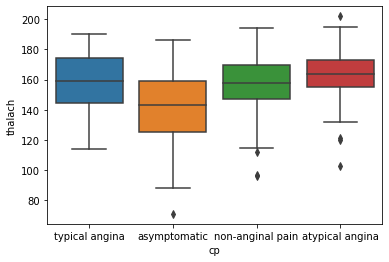

In [35]:
plt.clf()
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.show()

*Average `thalach` is much lower in people who are asymptomatic. The higher averages look to be in typical angina, and atypical angina.*

9. To investigate this further, save the values of `thalach` for patients who experienced each type of chest pain as `thalach_typical`, `thalach_asymptom`, `thalach_nonangin`, and `thalach_atypical`, respectively.

In [40]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

10. Run a single hypothesis test to address the following null and alternative hypotheses:

    -    Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
    -    Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

    Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

*Use ANOVA. There is at least one pair of chest pain categories with significantly different thalach.* 

In [43]:
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('The ANOVA p-value for thalach vs cp is: ' + str(pval) + '\n')


The ANOVA p-value for thalach vs cp is: 1.9065505247705008e-10



*I think asymptomatic plus any other category.*

11. If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (`cp`) for which people with those pain types have significantly different average max heart rates during exercise (`thalach`).

    Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.


In [46]:
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


12. Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of `cp` and `heart_disease` and save it as `Xtab`, then print it out.

In [47]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


*From codecademy: Based on this table, it seems like people who are diagnosed with heart disease tend to be asymptomatic, while people with who are not diagnosed with heart disease tend to have different kinds of chest pain. This helps explain our findings on the relationship between chest pain and max heart rate above. However, we’d have to do more research to try to understand why this is the case. It seems a little counter-intuitive!*

13. Run a hypothesis test for the following null and alternative hypotheses:

-    Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
-    Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

Save the p-value as pval and print it out. Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

In [50]:
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(pval)

1.2517106007837527e-17


*Yes, because this is less than 0.05, so there is a significant association between the variables.*

14. Congratulations! You’ve used a sample of data to understand how health related outcomes are associated with heart disease. Now that you’ve gotten your feet wet, there are a number of additional variables in this dataset that we haven’t looked at yet! If you want additional practice, use this space to continue your investigation. What other variables might be predictive of heart disease? Can you identify which hypothesis test to use for each variable?

    As a reminder, the variables in this data are:

    -    `age`: age in years
    -    `sex`: sex assigned at birth; `'male'` or `'female'`
    -    `trestbps`: resting blood pressure in mm Hg
    -    `chol`: serum cholesterol in mg/dl
    -    `cp`: chest pain type (`'typical angina'`, `'atypical angina'`, `'non-anginal pain'`, or `'asymptomatic'`)
    -    `exang`: whether the patient experiences exercise-induced angina (`1`: yes; `0`: no)
    -    `fbs`: whether the patient’s fasting blood sugar is >120 mg/dl (`1`: yes; `0`: no)
    -    `thalach`: maximum heart rate achieved in exercise test
    -    `heart_disease`: whether the patient is found to have heart disease (`'presence'`: diagnosed with heart disease; `'absence'`: no heart disease)

Is there an association between male and female and diagnosed with heart disease?

This would use a chi-square test.

- null hypothesis: there is no association between the variables (eg. males, females are all equally likely to have heart disease, so gender and heart disease are not associated).

In [51]:
table = pd.crosstab(heart.sex, heart.heart_disease)
print(table)

heart_disease  absence  presence
sex                             
female              72        25
male                92       114


In [52]:
chi2, pval, dof, expected = chi2_contingency(table)
print(pval)

2.666712348180942e-06


*The p-value is significant so we can reject the null hypothesis and assume there is an association between sex and heart disease.*